# Data Science Society Python Workshop 2023
> ***Just enoungh to be dangerous***

## Data import and preprocessing

 1. Standardization and OneHotEncoding
 2. Dimension reduction

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
wage=datasets.fetch_openml(data_id=534,as_frame=True, parser="pandas")
housing=datasets.fetch_california_housing(as_frame=True)

In [3]:
feature_wage = wage.feature_names
feature_housing = housing.feature_names #

In [4]:
house_data=housing['frame']
wage_data=wage['frame']
house_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
wage_data.describe(include="all")

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
count,534.000000,534,534,534.000000,534,534.000000,534.000000,534,534,534,534
unique,NaN,2,2,NaN,2,NaN,NaN,3,6,3,2
top,NaN,no,male,NaN,not_member,NaN,NaN,White,Other,Other,Married
freq,NaN,378,289,NaN,438,NaN,NaN,440,156,411,350
mean,13.018727,NaN,NaN,17.822097,NaN,9.024064,36.833333,NaN,NaN,NaN,NaN
std,2.615373,NaN,NaN,12.379710,NaN,5.139097,11.726573,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,0.000000,NaN,1.000000,18.000000,NaN,NaN,NaN,NaN
25%,12.000000,NaN,NaN,8.000000,NaN,5.250000,28.000000,NaN,NaN,NaN,NaN
50%,12.000000,NaN,NaN,15.000000,NaN,7.780000,35.000000,NaN,NaN,NaN,NaN
75%,15.000000,NaN,NaN,26.000000,NaN,11.250000,44.000000,NaN,NaN,NaN,NaN


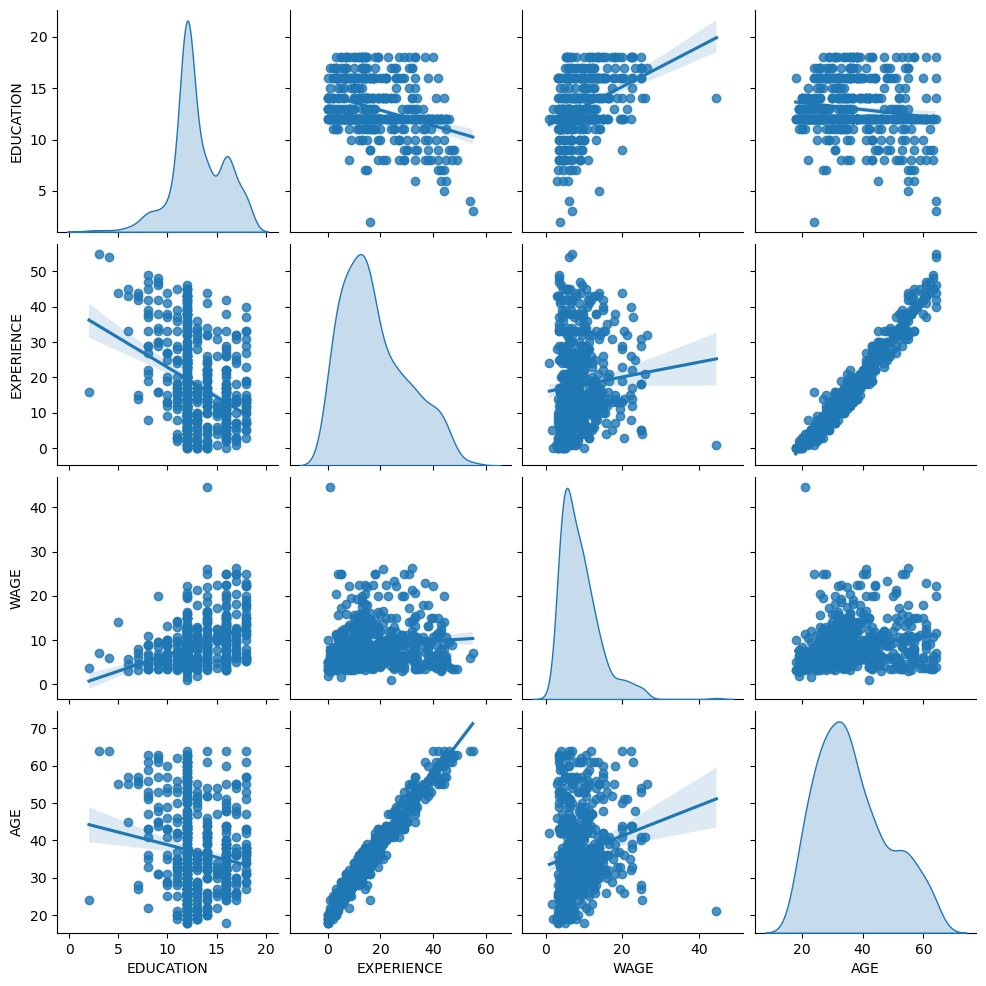

In [6]:
sns.pairplot(wage_data, kind="reg", diag_kind="kde")
plt.show()

### Preprocessing
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

In [7]:
from sklearn.model_selection import train_test_split
#Split data set
y= house_data['MedHouseVal']
x= house_data[feature_housing]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [9]:
y_train

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: MedHouseVal, Length: 16512, dtype: float64

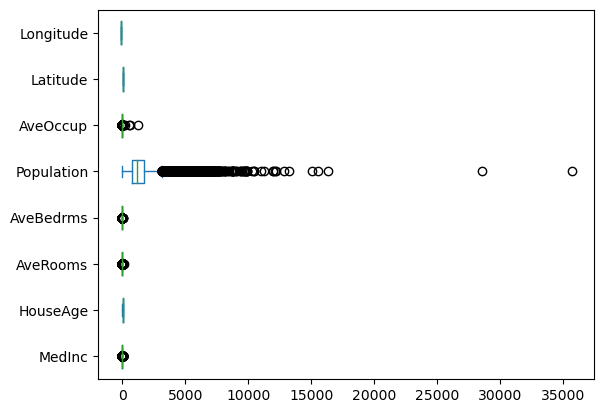

In [10]:
x_train.plot.box(vert=False)
plt.show()

### Standardization
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [11]:
from sklearn import preprocessing
maxabs_scaler=preprocessing.MaxAbsScaler()
standard_scaler=preprocessing.StandardScaler()
power_scaler=preprocessing.PowerTransformer(method="yeo-johnson")

In [12]:
maxabs_x=maxabs_scaler.fit_transform(x_train)
standard_x=standard_scaler.fit_transform(x_train)
power_x=power_scaler.fit_transform(x_train)

In [13]:
type(maxabs_x)

numpy.ndarray

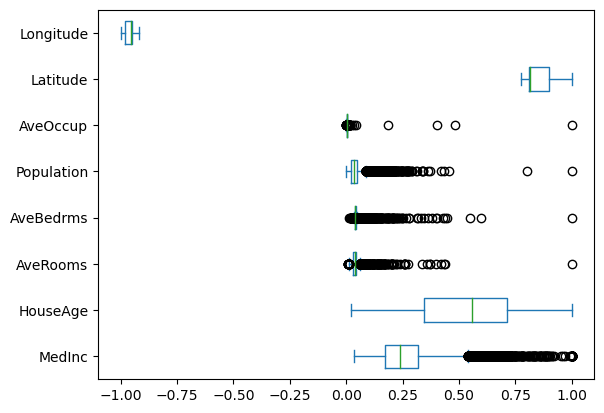

In [14]:
pd.DataFrame(maxabs_x,columns=feature_housing).plot.box(vert=False)
plt.show()

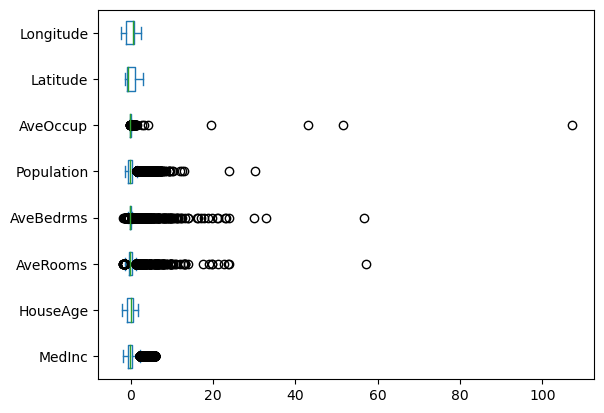

In [15]:
pd.DataFrame(standard_x,columns=feature_housing).plot.box(vert=False)
plt.show()

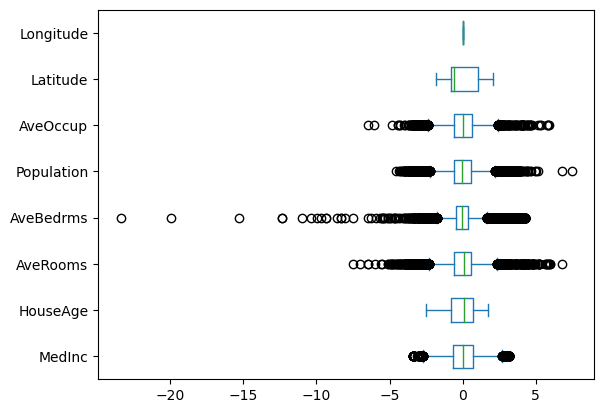

In [16]:
pd.DataFrame(power_x,columns=feature_housing).plot.box(vert=False)
plt.show()

### One Hot Encoder 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [17]:
categorical_columns = ["RACE", "OCCUPATION", "SECTOR", "MARR", "UNION", "SEX", "SOUTH"] #wage dataset categorical
numerical_columns = ["EDUCATION", "EXPERIENCE", "AGE"]#wage dataset numeric
wage_y= wage_data['WAGE']
wage_x= wage_data[feature_wage]
wx_train, wx_test, wy_train, wy_test = sk.model_selection.train_test_split(wage_x,wage_y, test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import OneHotEncoder
OneHot=sk.preprocessing.OneHotEncoder(drop='if_binary', sparse_output=False)
onehot_x=OneHot.fit_transform(wx_train[categorical_columns])
pd.DataFrame(onehot_x, columns=OneHot.get_feature_names_out())

,RACE_Hispanic,RACE_Other,RACE_White,OCCUPATION_Clerical,OCCUPATION_Management,OCCUPATION_Other,OCCUPATION_Professional,OCCUPATION_Sales,OCCUPATION_Service,SECTOR_Construction,SECTOR_Manufacturing,SECTOR_Other,MARR_Unmarried,UNION_not_member,SEX_male,SOUTH_yes
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
423,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
424,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
425,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


### Dimension Reduction

In [19]:
from sklearn.decomposition import PCA
PCA_transform=sk.decomposition.PCA(n_components=4)
PCA_x=PCA_transform.fit_transform(standard_x)

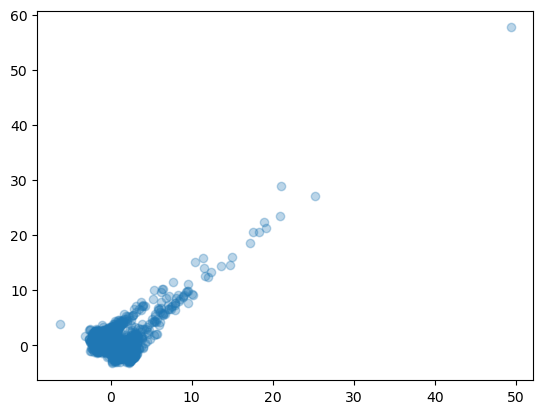

In [20]:
plt.scatter(PCA_x[:, 0], PCA_x[:, 1], alpha=0.3, label="samples")
plt.show()

## Regression
   1. Ordinary Least Squares
   2. Lasso
   3. Elastic-Net
   4. SVR
   5. Decision Trees

### Ordinary least Squares
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [21]:
from sklearn import linear_model
OLS=linear_model.LinearRegression(fit_intercept=True)
model1=OLS.fit(x_train,y_train)
model1.score(x_train,y_train)

0.6125511913966952

In [22]:
model1.coef_ # Coefficient of regression Model

array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

In [23]:
R1=model1.score(x_test,y_test) #coefficient of determination
R1

0.575787706032451

In [24]:
pred_y=model1.predict(x_test) #Prediction on new Data
rmse=(np.sum((y_test-pred_y)**2))**0.5 #RMSE calculation
rmse

47.90324122033881

In [25]:
1-(((y_test-pred_y)**2).sum())/(((y_test-y_test.mean())**2).sum())

0.575787706032451

In [26]:
model2=OLS.fit(power_x,y_train) #fit linear regression on power transform
R2=model2.score(power_scaler.transform(x_test),y_test)
R2

0.6061331233799322

In [27]:
data = {'Model':['Linear', 'Box-Cox'], 'Score':[R1, R2]}
scores=pd.DataFrame(data)
scores

,Model,Score
0,Linear,0.575788
1,Box-Cox,0.606133


### Lasso
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

In [28]:
Lasso=sk.linear_model.Lasso(alpha=1.0)
model_3=Lasso.fit(x_train,y_train)
R_3=model_3.score(x_test,y_test)
scores.loc[len(scores)] = ['Lasso', R_3]
scores

,Model,Score
0,Linear,0.575788
1,Box-Cox,0.606133
2,Lasso,0.284167


In [29]:
model_3.coef_ 

array([ 1.48196324e-01,  5.72821070e-03,  0.00000000e+00, -0.00000000e+00,
       -8.16437293e-06, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [30]:
pred_y=model_3.predict(x_test) #Prediction on new Data
rmse=(np.sum((y_test-pred_y)**2))**0.5 #RMSE calculation
rmse

62.22703051061872

In [31]:
LassoCV=sk.linear_model.LassoCV(cv=5, random_state=0)
model_4=Lasso.fit(x_train,y_train)
R_4=model_4.score(x_test,y_test)
scores.loc[len(scores)] = ['LassoCV', R_4]
scores

,Model,Score
0,Linear,0.575788
1,Box-Cox,0.606133
2,Lasso,0.284167
3,LassoCV,0.284167


### Elastic Net
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [33]:
ElasticNet=sk.linear_model.ElasticNet(alpha=1.0)
model_5=ElasticNet.fit(x_train,y_train)
R_5=model_5.score(x_test,y_test)
scores.loc[len(scores)] = ['ElasticNet', R_5]
scores

,Model,Score
0,Linear,0.575788
1,Box-Cox,0.606133
2,Lasso,0.284167
3,LassoCV,0.284167
4,ElasticNet,0.416552


In [35]:
model_5.coef_ 

array([ 2.55274615e-01,  1.12300735e-02,  0.00000000e+00, -0.00000000e+00,
        7.75939261e-06, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [36]:
pred_y=model_5.predict(x_test) #Prediction on new Data
rmse=(np.sum((y_test-pred_y)**2))**0.5 #RMSE calculation
rmse

56.1790502194482

In [37]:
ElasticNetCV=sk.linear_model.ElasticNetCV(cv=5, random_state=6)
model_6=ElasticNetCV.fit(x_train,y_train)
R_6=model_6.score(x_test,y_test)
scores.loc[len(scores)] = ['ElasticNetCV', R_6]
scores

,Model,Score
0,Linear,0.575788
1,Box-Cox,0.606133
2,Lasso,0.284167
3,LassoCV,0.284167
4,ElasticNet,0.416552
5,ElasticNetCV,0.571871


### Support Vector Regression
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [38]:
from sklearn import svm
SVRm=svm.SVR(kernel='rbf',C=1.0, epsilon=0.1)
model_7=SVRm.fit(standard_x,y_train)
R_7=model_7.score(standard_scaler.transform(x_test),y_test)
scores.loc[len(scores)] = ['SVR', R_7]
scores

,Model,Score
0,Linear,0.575788
1,Box-Cox,0.606133
2,Lasso,0.284167
3,LassoCV,0.284167
4,ElasticNet,0.416552
5,ElasticNetCV,0.571871
6,SVR,0.727563


### Pipelines

In [39]:
from sklearn.pipeline import make_pipeline

SVR2 = make_pipeline(preprocessing.StandardScaler(), svm.SVR(C=1.0, epsilon=0.1))
model_8=SVR2.fit(x_train,y_train)
R_8=model_8.score(x_test,y_test)
scores.loc[len(scores)] = ['SVR2', R_8]
scores

,Model,Score
0,Linear,0.575788
1,Box-Cox,0.606133
2,Lasso,0.284167
3,LassoCV,0.284167
4,ElasticNet,0.416552
5,ElasticNetCV,0.571871
6,SVR,0.727563
7,SVR2,0.727563


### Decision Tree Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [40]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree=DecisionTreeRegressor(criterion='squared_error',min_samples_split=2)
model_9=DecisionTree.fit(x_train,y_train)
R_9=model_9.score(x_test,y_test)
scores.loc[len(scores)] = ['DecisionTree', R_9]
scores

,Model,Score
0,Linear,0.575788
1,Box-Cox,0.606133
2,Lasso,0.284167
3,LassoCV,0.284167
4,ElasticNet,0.416552
5,ElasticNetCV,0.571871
6,SVR,0.727563
7,SVR2,0.727563
8,DecisionTree,0.623941


## Classification
   1. Logistic regressio
   2. Linear Discriminant Analysis
   2. SVM
   3. Decision Trees/Random Forest
   4. AdaBoost
   
Dataset: https://archive.ics.uci.edu/ml/datasets/Covertype

In [41]:
covtype=datasets.fetch_covtype(as_frame=True)
cover_data=covtype['frame']

In [42]:
feature_covtype = covtype.feature_names

In [43]:
y= cover_data['Cover_Type']
x= cover_data[feature_covtype]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [44]:
Logistic=linear_model.LogisticRegression(penalty='l2')
model_10=Logistic.fit(x_train,y_train)
y_pred=model_10.predict(x_test)
R_10=model_10.score(x_test,y_test)
R_10

C:\Users\Proxima\.conda\envs\csv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.622281696685972

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.622281696685972

## Linear Discriminant Analysis

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
model_11=LDA.fit(x_train,y_train)
y_pred=model_11.predict(x_test)
R_11=model_11.score(x_test,y_test)
R_11

0.6782785298142044

In [47]:
data = {'Model':['Logistic', 'LDA'], 'Score':[R_10, R_11]}
C_scores=pd.DataFrame(data)
C_scores

,Model,Score
0,Logistic,0.622282
1,LDA,0.678279


## Support Vector Machines

In [ ]:
SVC = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1.0))
model_12=SVC.fit(x_train,y_train)
R_12=model_12score(x_test,y_test)
C_scores.loc[len(C_scores)] = ['SVC', R_12]
scores